<a href="https://colab.research.google.com/github/judazag/Computacion-Visual/blob/main/2025-04-21_taller_estructuras_3d/python/python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
pip install trimesh[easy] matplotlib pillow


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.7/109.7 kB 3.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 21.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.0/97.0 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.2/17.2 MB 94.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 541.1/541.1 kB 30.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 709.3/709.3 kB 37.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 266.1/266.1 kB 19.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 14.5 MB/s eta 0:00:00
  Created wheel for pycollada: filename=pycollada-0.9-py3-none-any.whl size=128524 sha256=8ec6117a9820e79edfbde5f39d7d1d017ecdc9617e4a2a2891cf18a9f43fd647
  Stored in directory: /root/.cache/pip/wheels/d8/f5/25/96914138081f519

In [1]:
from google.colab import files
uploaded = files.upload()

Saving Sting-Sword-lowpoly.obj to Sting-Sword-lowpoly.obj


In [7]:
import trimesh

filename = list(uploaded.keys())[0]
mesh = trimesh.load_mesh(filename)

# Propiedades básicas
verts = mesh.vertices
faces = mesh.faces
edges = mesh.edges_unique

print(f"Vertices: {len(verts)}, Caras: {len(faces)}, Aristas: {len(edges)}")


Vertices: 1329, Caras: 2596, Aristas: 3919


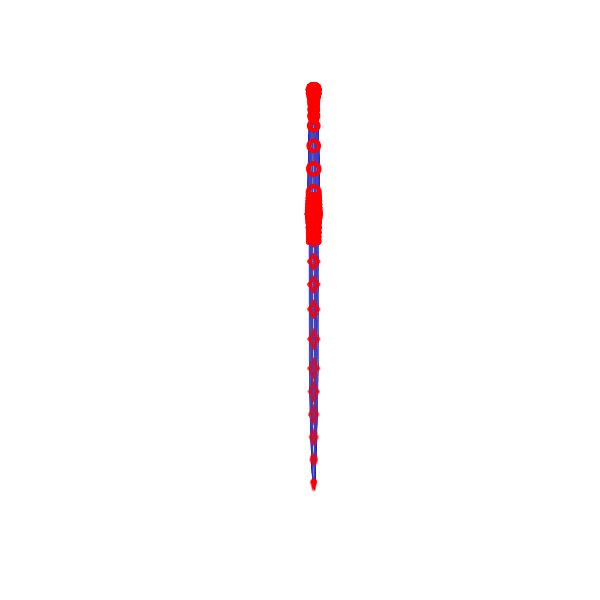

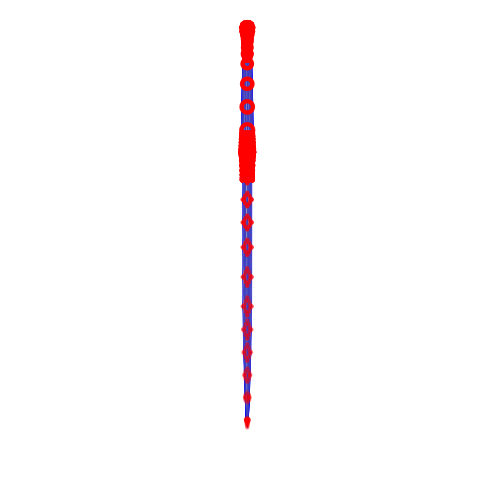

In [9]:
import trimesh
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from matplotlib import animation
from IPython.display import Image

# Límites y aspecto
x_min, x_max = verts[:,0].min(), verts[:,0].max()
y_min, y_max = verts[:,1].min(), verts[:,1].max()
z_min, z_max = verts[:,2].min(), verts[:,2].max()
aspect = [x_max-x_min, y_max-y_min, z_max-z_min]

# 3. Crear figura y ejes (vacíos)
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(projection='3d')
ax.axis('off')

def animate(angle):
    ax.cla()  # limpia TODO el eje
    ax.axis('off')
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_zlim(z_min, z_max)
    ax.set_box_aspect(aspect)
    ax.view_init(elev=30, azim=angle)

    # Caras (gris semitransparente)
    poly = Poly3DCollection(verts[faces],
                            facecolors='gray',
                            edgecolors='none',
                            alpha=0.3)
    ax.add_collection3d(poly)

    # Aristas (azul)
    for e in edges:
        seg = verts[list(e)]
        ax.plot(seg[:,0], seg[:,1], seg[:,2],
                color='blue', linewidth=0.5)

    # Vértices (rojo)
    ax.scatter(verts[:,0], verts[:,1], verts[:,2],
               color='red', s=5)

# 4. Generar animación
anim = animation.FuncAnimation(
    fig, animate,
    frames=np.arange(0, 360, 2),
    interval=50,
    blit=False  # redibuja todo cada vez
)

# 5. Guardar y mostrar GIF
anim.save('rotacion_malla_completa.gif', writer='pillow', fps=20)
Image(filename='rotacion_malla_completa.gif')